In [2]:
from bs4 import BeautifulSoup
import pandas as pd
import requests
import time
import re
import requests
import time
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from datetime import datetime


### Obtaining the URL Link of the first page 

In [3]:
search_url =  "https://helpjuice.com/blog?page=3"
r = requests.get(search_url)
soup = BeautifulSoup(r.text, 'html.parser')
blogs = soup.find_all('div', class_ = 'post')

### Getting the blog names and blog links 

In [4]:
links =[]
blog_names = []
for blog in blogs:
    blog_name = blog.h3.text
    blog_link = blog.a['href']
    print(f'blog_name : {blog_name}')
    print(f'blog_link : {blog_link}')
    links.append(blog_link) 
    blog_names.append(blog_name)


blog_name : 10 Best Help Authoring Software and Tools [2022]
blog_link : /blog/help-authoring-tools
blog_name : Product Documentation: How to Create It & the Best Software to Use
blog_link : /blog/product-documentation
blog_name : How to Create a Product Knowledge Training Program
blog_link : /blog/product-knowledge
blog_name : What is a Customer Self-Service Portal [And How to Create One]
blog_link : /blog/customer-self-service-portal
blog_name : The Best Notion Alternatives for Project Management [2022]

blog_link : /blog/notion-alternatives
blog_name : Corporate Wiki vs Knowledge Base: Which is Better?
blog_link : /blog/corporate-wiki
blog_name : How to Use Surveys to Improve Your Knowledge Base 
blog_link : /blog/knowledge-base-survey
blog_name : Knowledge Base Software Guide: The 15 Best KB Tools [2022]
blog_link : /blog/best-knowledge-base-software
blog_name : Cross-Team Collaboration: 7 Strategies to Improve Team Productivity
blog_link : /blog/cross-team-collaboration
blog_name 

### Iterating over the links and finding the Author Names , Date Published and it's content.

In [5]:
paras = []
Author =[]
date = []
for link in links:
    s = "https://helpjuice.com/"+link
    r = requests.get(s)
    soup = BeautifulSoup(r.text, 'html.parser')
    blog_Author = soup.h4.text
    blog_date = soup.span.text
    para = soup.article.text
    paras.append(para)
    Author.append(blog_Author)
    date.append(blog_date)
#print(paras)
#print(Author)
#print(date)
    

### Removing the stopwords by lemmatizing the paragraph so that we can use the words to find the keywords.

In [6]:
def text_preprocess_output(sentence):
    lemmatizer = WordNetLemmatizer()

    for i in range(len(sentence)):
        words = re.sub('[^a-zA-Z]', ' ', sentence[i]) 
        words = words.lower()
        words = words.split()
        words = [lemmatizer.lemmatize(word) for word in words if not word in stopwords.words('english')]
        sentence[i] = ' '.join(words)
        

In [7]:
text_preprocess_output(paras)

### prints the top 3 key words in each blogs

In [8]:
for i in paras:
    words_inb_log = i.split()
    df = pd.DataFrame(words_inb_log)
    top3 = df.value_counts()[:3]
    print(f'top3 kewords: {top3}')  

top3 kewords: help         59
tool         46
authoring    37
dtype: int64
top3 kewords: product          109
documentation     85
user              47
dtype: int64
top3 kewords: product      132
knowledge     76
training      68
dtype: int64
top3 kewords: customer    64
service     50
self        29
dtype: int64
top3 kewords: team       51
feature    47
project    41
dtype: int64
top3 kewords: knowledge    77
wiki         46
content      36
dtype: int64
top3 kewords: knowledge    43
base         41
survey       40
dtype: int64
top3 kewords: knowledge    303
base         192
software     109
dtype: int64
top3 kewords: team             107
cross             51
collaboration     41
dtype: int64
top3 kewords: knowledge    69
base         59
software     51
dtype: int64
top3 kewords: knowledge    47
base         42
customer     16
dtype: int64
top3 kewords: customer    175
service     107
best         23
dtype: int64


In [9]:
ls =[]
for i in paras:
    words_inb_log = i.split()
    df = pd.DataFrame(words_inb_log)
    d = df.value_counts()[:3].reset_index(name='col')[0]
    ls.append(d)
    

### storing the top 3 key words as a list

In [10]:
l = []
for i in ls:
        w = ' '.join(i)
        l.append(w)
print(l)        

['help tool authoring', 'product documentation user', 'product knowledge training', 'customer service self', 'team feature project', 'knowledge wiki content', 'knowledge base survey', 'knowledge base software', 'team cross collaboration', 'knowledge base software', 'knowledge base customer', 'customer service best']


### Spliting the name and storing it in a list

In [11]:
Blog_author =[]
for i in Author:
    Blog_author.append(i.split(":")[1])
print(Blog_author)    


[' Josh Brown', ' Josh Brown', ' Josh Brown', ' Josh Brown', ' Josh Brown', ' Josh Brown', ' Josh Brown', ' Josh Brown', ' Josh Brown', ' Josh Brown', ' Josh Brown', ' Josh Brown']


### Spliting the date and storing in a list

In [12]:
Blog_date =[]
for i in date:
    Blog_date.append(i.split(":")[1])
print(Blog_date)    

[' January 22 2022', ' January 18 2022', ' January 11 2022', ' December 16 2021', ' December 16 2021', ' November 16 2021', ' November 16 2021', ' November 12 2021', ' November 08 2021', ' November 03 2021', ' November 01 2021', ' November 01 2021']


In [13]:
l

['help tool authoring',
 'product documentation user',
 'product knowledge training',
 'customer service self',
 'team feature project',
 'knowledge wiki content',
 'knowledge base survey',
 'knowledge base software',
 'team cross collaboration',
 'knowledge base software',
 'knowledge base customer',
 'customer service best']

In [23]:
def convertdate(dstring):
      return datetime.strptime(dstring, ' %B %d %Y')
df = pd.DataFrame(Blog_date)
df


0
0     January 22 2022
1     January 18 2022
2     January 11 2022
3    December 16 2021
4    December 16 2021
5    November 16 2021
6    November 16 2021
7    November 12 2021
8    November 08 2021
9    November 03 2021
10   November 01 2021
11   November 01 2021

In [24]:
df["Title"] = blog_names
df['Author'] = Blog_author
df['date'] = df[0].apply(lambda x: convertdate(x))
df['key_words'] = l 
df['paras'] = paras
del df[0]
df

Title       Author       date  \
0    10 Best Help Authoring Software and Tools [2022]   Josh Brown 2022-01-22   
1   Product Documentation: How to Create It & the ...   Josh Brown 2022-01-18   
2   How to Create a Product Knowledge Training Pro...   Josh Brown 2022-01-11   
3   What is a Customer Self-Service Portal [And Ho...   Josh Brown 2021-12-16   
4   The Best Notion Alternatives for Project Manag...   Josh Brown 2021-12-16   
5   Corporate Wiki vs Knowledge Base: Which is Bet...   Josh Brown 2021-11-16   
6   How to Use Surveys to Improve Your Knowledge B...   Josh Brown 2021-11-16   
7   Knowledge Base Software Guide: The 15 Best KB ...   Josh Brown 2021-11-12   
8   Cross-Team Collaboration: 7 Strategies to Impr...   Josh Brown 2021-11-08   
9   The 11 Best Open Source Knowledge Base Softwar...   Josh Brown 2021-11-03   
10       The Best SaaS Knowledge Base Software [2022]   Josh Brown 2021-11-01   
11  Customer Service Best Practices: The Top 8 Str...   Josh Brown 2021-11-01   

                     key_words  \
0          help tool authoring   
1   product documentation user   
2   product knowledge training   
3        customer service self   
4         team feature project   
5       knowledge wiki content   
6        knowledge base survey   
7      knowledge base software   
8     team cross collaboration   
9      knowledge base software   
10     knowledge base customer   
11       customer service best   

                                                paras  
0   already know customer support crucial know cus...  
1   let audible groan upon seeing term product doc...  
2   employee know product like know know could des...  
3   go without saying company providing excellent ...  
4   quality knowledge management project managemen...  
5   company interested investing employee engageme...  
6   come surprise company use learn customer servi...  
7   knowledge base perhaps integral piece puzzle c...  
8   teamwork make dreamwork together everyone achi...  
9   denying knowledge base make major impact organ...  
10  old adage knowledge power true ever way use in...  
11  exceptional customer service concept business ...

In [39]:
df.loc[:,['Title','Author','date','key_words']].to_excel('blog_data_p3.xlsx' ,index=False)

### Checking the condition for building the word cloud 

In [16]:
months = df[(df['date']>'2020-12-31') & (df['date']<'2022-04-01')]

months

Title       Author       date  \
0    10 Best Help Authoring Software and Tools [2022]   Josh Brown 2022-01-22   
1   Product Documentation: How to Create It & the ...   Josh Brown 2022-01-18   
2   How to Create a Product Knowledge Training Pro...   Josh Brown 2022-01-11   
3   What is a Customer Self-Service Portal [And Ho...   Josh Brown 2021-12-16   
4   The Best Notion Alternatives for Project Manag...   Josh Brown 2021-12-16   
5   Corporate Wiki vs Knowledge Base: Which is Bet...   Josh Brown 2021-11-16   
6   How to Use Surveys to Improve Your Knowledge B...   Josh Brown 2021-11-16   
7   Knowledge Base Software Guide: The 15 Best KB ...   Josh Brown 2021-11-12   
8   Cross-Team Collaboration: 7 Strategies to Impr...   Josh Brown 2021-11-08   
9   The 11 Best Open Source Knowledge Base Softwar...   Josh Brown 2021-11-03   
10       The Best SaaS Knowledge Base Software [2022]   Josh Brown 2021-11-01   
11  Customer Service Best Practices: The Top 8 Str...   Josh Brown 2021-11-01   

                     key_words  \
0          help tool authoring   
1   product documentation user   
2   product knowledge training   
3        customer service self   
4         team feature project   
5       knowledge wiki content   
6        knowledge base survey   
7      knowledge base software   
8     team cross collaboration   
9      knowledge base software   
10     knowledge base customer   
11       customer service best   

                                                paras  
0   already know customer support crucial know cus...  
1   let audible groan upon seeing term product doc...  
2   employee know product like know know could des...  
3   go without saying company providing excellent ...  
4   quality knowledge management project managemen...  
5   company interested investing employee engageme...  
6   come surprise company use learn customer servi...  
7   knowledge base perhaps integral piece puzzle c...  
8   teamwork make dreamwork together everyone achi...  
9   denying knowledge base make major impact organ...  
10  old adage knowledge power true ever way use in...  
11  exceptional customer service concept business ...

### WORD CLOUD

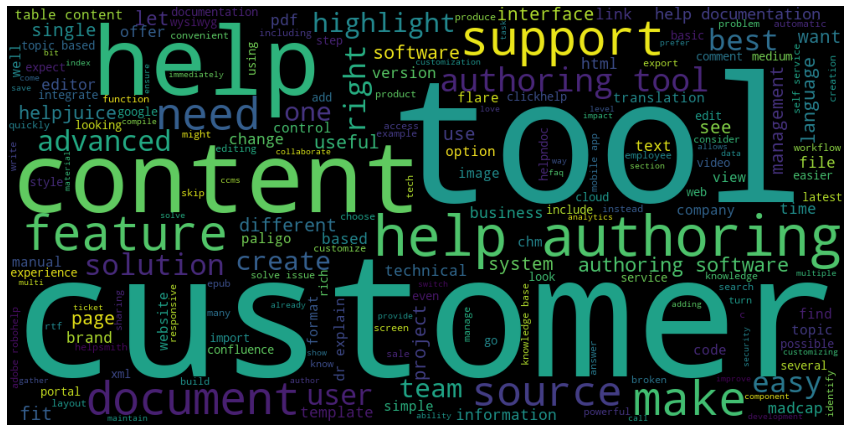

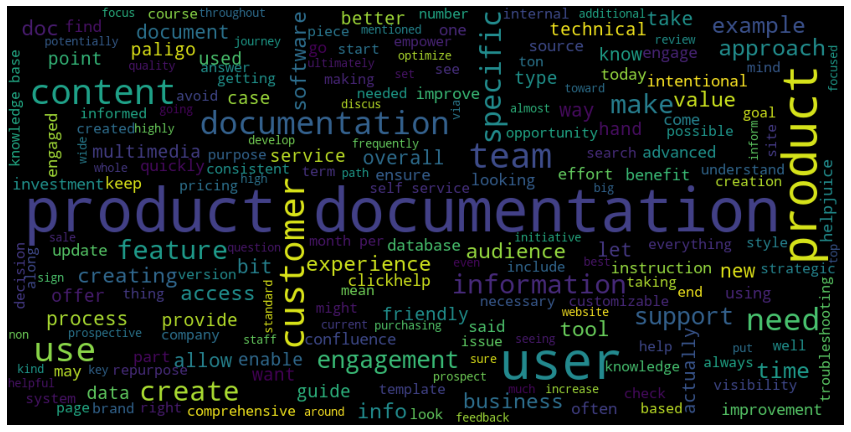

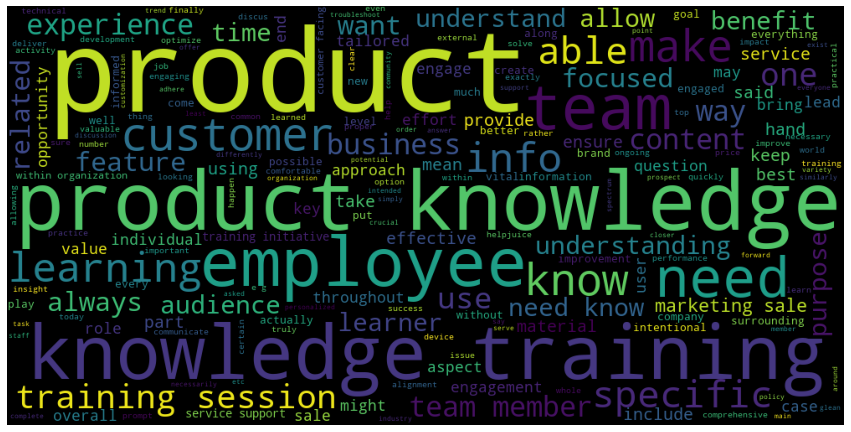

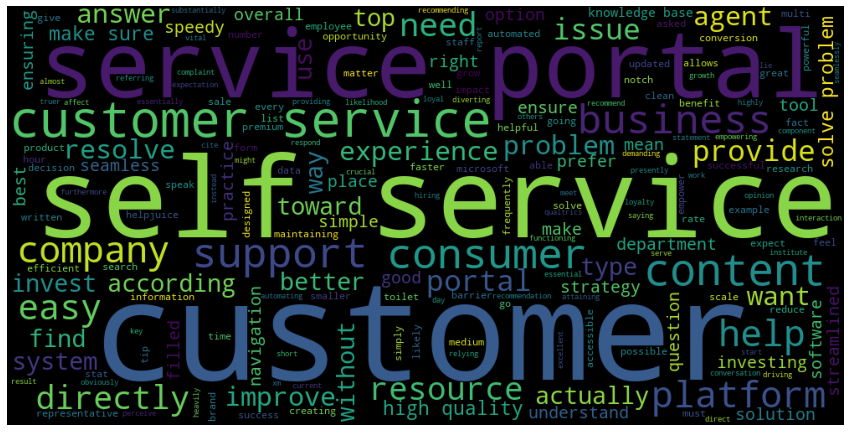

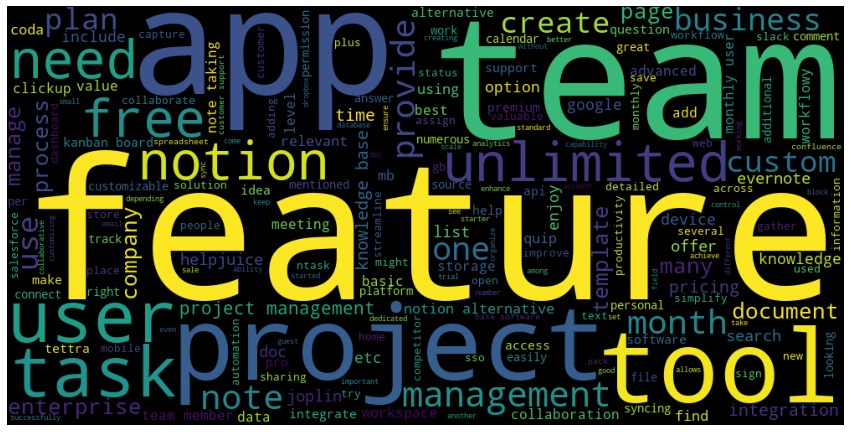

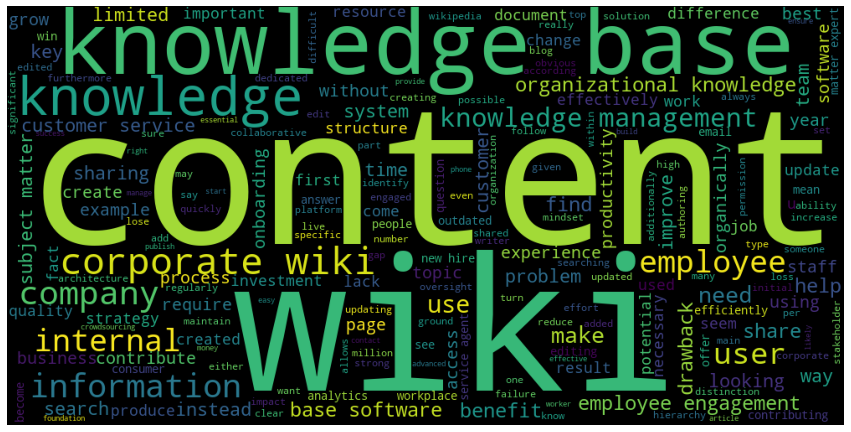

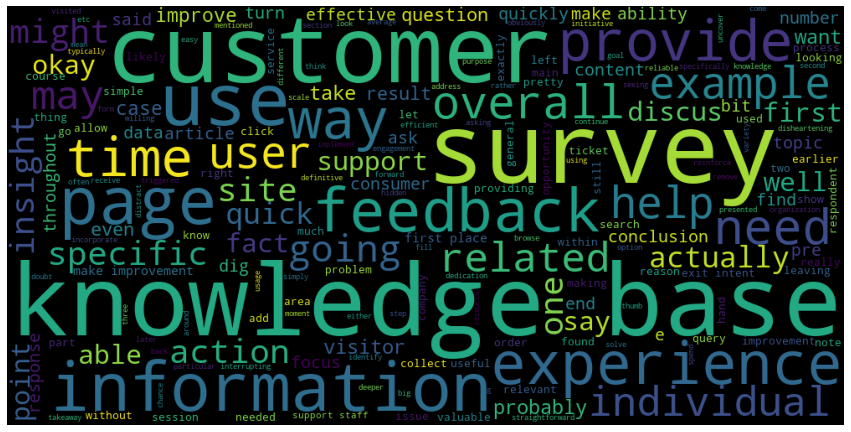

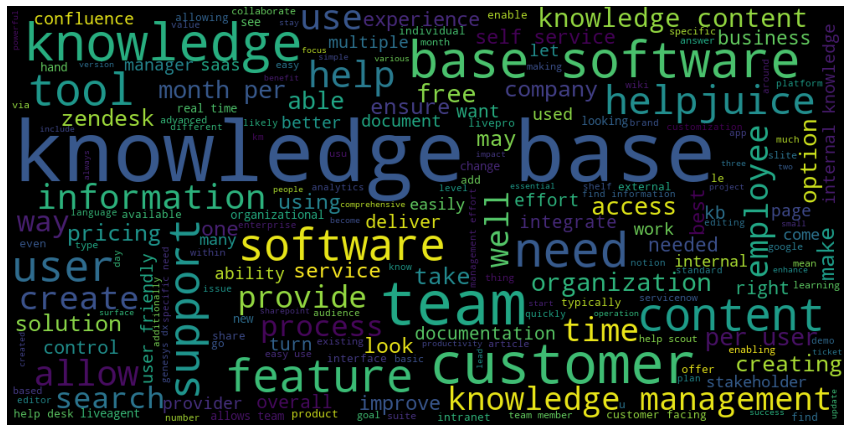

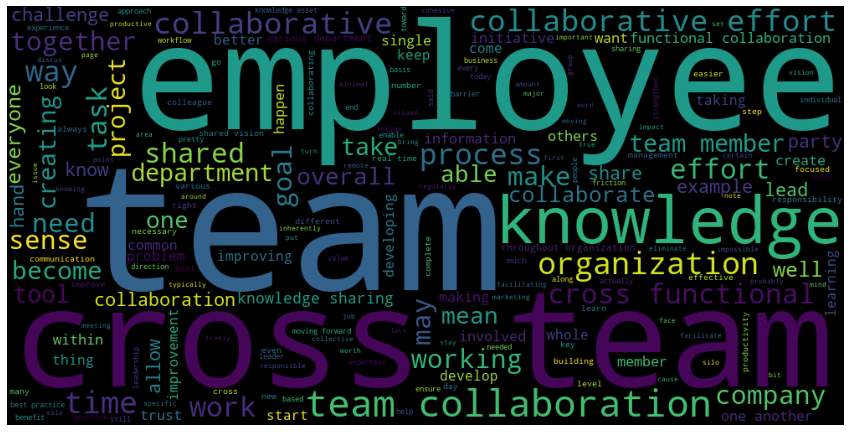

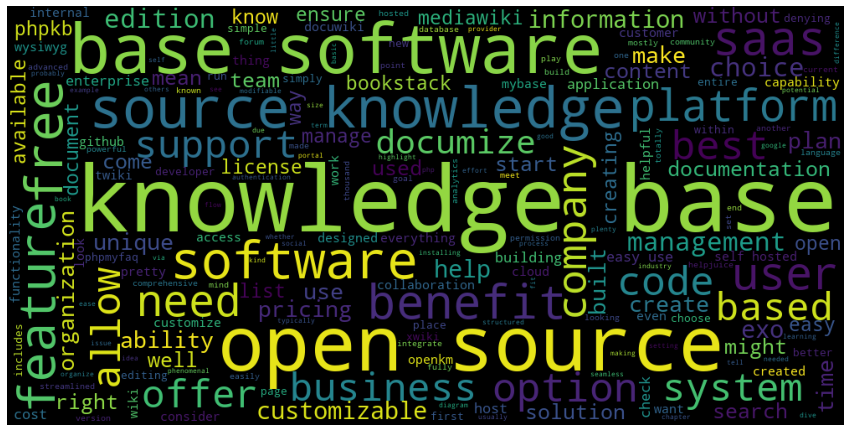

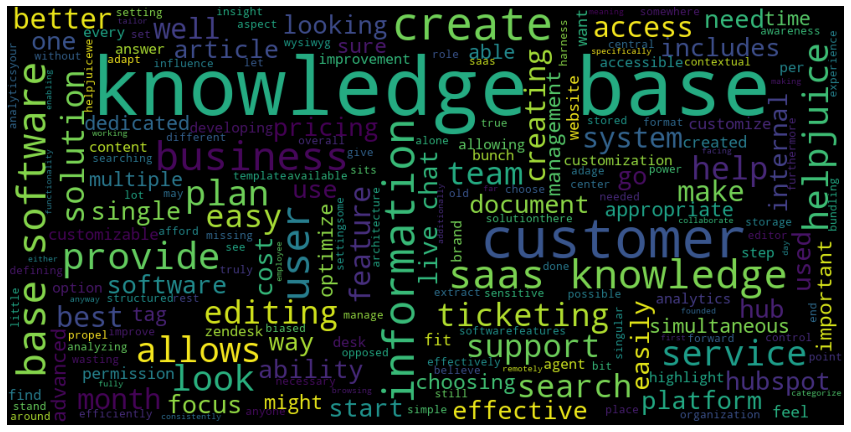

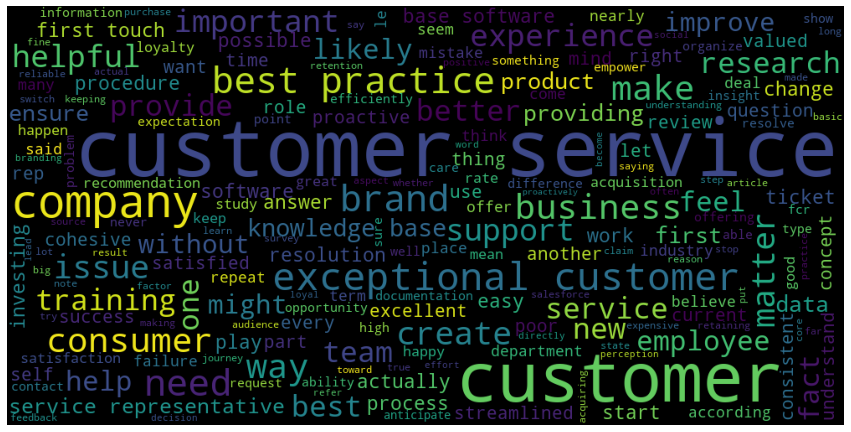

In [17]:

import matplotlib.pyplot as plt
from wordcloud import WordCloud
for i in df['paras']:
    wordcloud = WordCloud(width = 1000, height = 500).generate(i)
    plt.figure(figsize=(15,8))
    plt.imshow(wordcloud)
    plt.axis("off")
    #plt.savefig("your_file_name"+".png", bbox_inches='tight')
    plt.show()
    #plt.close()